In [1]:
!pip install wordcloud


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from PIL import Image
from collections import OrderedDict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\douja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
chemin_fichier = 'C:\\Users\\douja\\OneDrive\\Desktop\\Formation Data Analyst\\Projets Fil Rouge_Data\\Données Projet Financement Participatif//Kickstarter Campaigns DataSet.csv'

df = pd.read_csv(chemin_fichier)

In [4]:
df = df.drop(['Unnamed: 0','slug','name', 'creator_id','id'], axis = 1)
#on va compter les lignes en doubles
print("duplicates: ", df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)

print("length of dataset after removal of duplicates is ", len(df))

#supprimer les projets canceled et live du Dataset
df= df.loc[(df['status']=='successful') | (df['status']=='failed')]
print(df['status'].unique())

duplicates:  19527
length of dataset after removal of duplicates is  197718
['failed' 'successful']


In [5]:
df['text_len'] = df['blurb'].apply(len)
df['word_count'] = df['blurb'].apply(lambda x: len(x.split()))
df.head()

,currency,launched_at,backers_count,blurb,country,deadline,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration,text_len,word_count
0,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,122,18
1,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0,35,6
2,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0,122,20
3,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0,69,11
4,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0,131,22


In [6]:
columns={"usd_pledged": "Pledged",
          "backers_count": "Backers",
         "goal_usd": "Goal",
         "sub_category": "Category",
         "main_category": "sub_category"
        }

df.rename(columns=columns, inplace=True)
df.head()

,currency,launched_at,Backers,blurb,country,deadline,status,Pledged,Category,sub_category,blurb_length,Goal,city,duration,text_len,word_count
0,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,failed,577.902078,food,Farms,122,785.82065,Victoria,60.0,122,18
1,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,successful,211.000000,publishing,Academic,35,93.00000,San Diego,24.0,35,6
2,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,successful,4697.000000,food,Small Batch,122,1500.00000,Philadelphia,30.0,122,20
3,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,failed,222.000000,technology,Gadgets,69,25000.00000,Chicago,60.0,69,11
4,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,successful,5410.000000,publishing,Radio & Podcasts,131,5000.00000,Madrid,30.0,131,22


# Text Mining Blurb

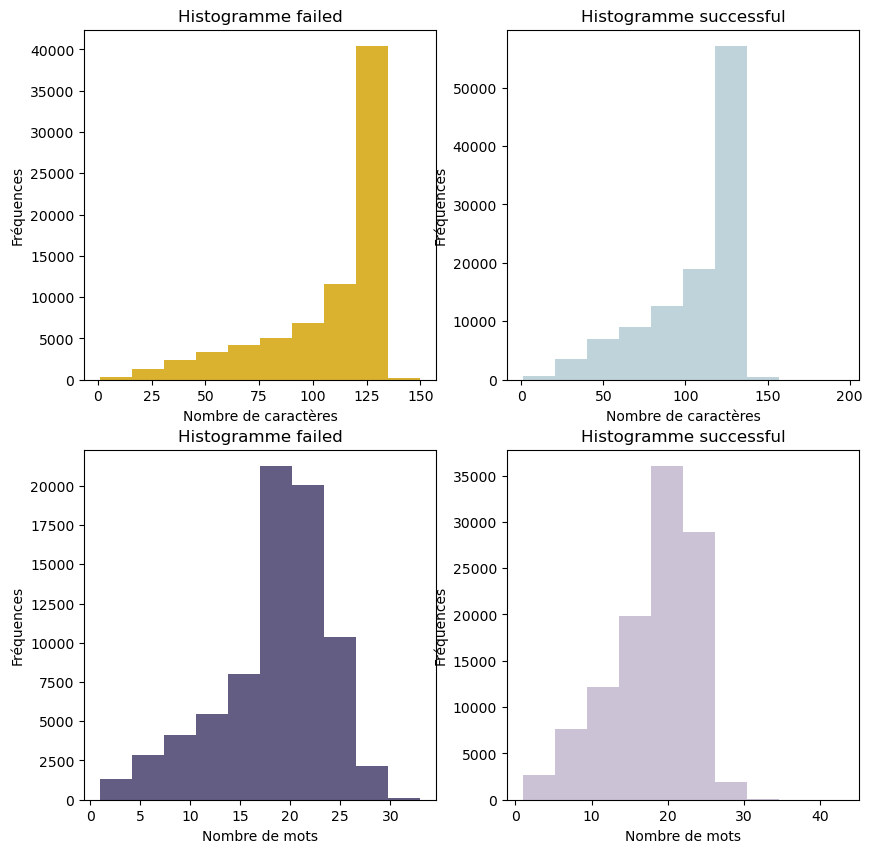

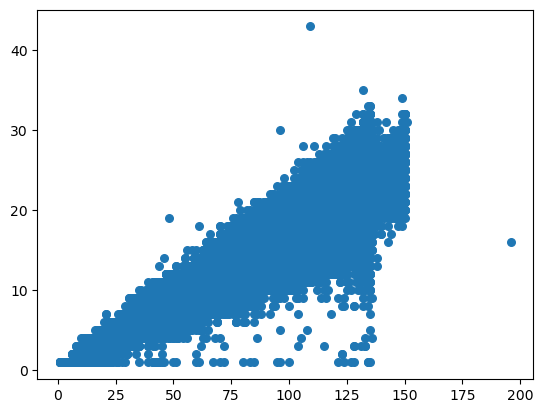

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(df[df['status'] == 'failed']['text_len'], bins=10, color = '#DAB22F')
axs[0, 0].set_xlabel('Nombre de caractères')
axs[0, 0].set_ylabel('Fréquences')
axs[0, 0].set_title('Histogramme failed')

axs[0, 1].hist(df[df['status'] == 'successful']['text_len'], bins=10, color = '#BED4DA')
axs[0, 1].set_xlabel('Nombre de caractères')
axs[0, 1].set_ylabel('Fréquences')
axs[0, 1].set_title('Histogramme successful')

axs[1, 0].hist(df[df['status'] == 'failed']['word_count'], bins=10 , color = '#635D83')
axs[1, 0].set_xlabel('Nombre de mots')
axs[1, 0].set_ylabel('Fréquences')
axs[1, 0].set_title('Histogramme failed')

axs[1, 1].hist(df[df['status'] == 'successful']['word_count'], bins=10, color = '#CCC2D6')
axs[1, 1].set_xlabel('Nombre de mots')
axs[1, 1].set_ylabel('Fréquences')
axs[1, 1].set_title('Histogramme successful')

plt.show()


plt.scatter(df.text_len, df.word_count,  s=30);
#df.text_len.describe()

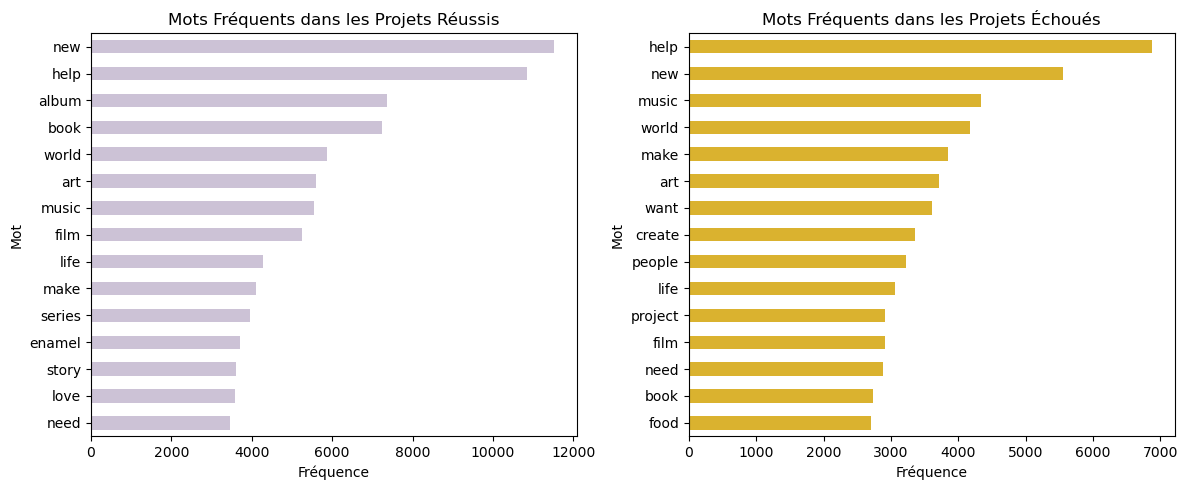

In [8]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Créer un vectoriseur pour les projets réussis
vectorizer_successful = CountVectorizer(ngram_range=(1, 1), stop_words='english')
bag_of_words_successful = vectorizer_successful.fit_transform(df[df['status'] == 'successful']['blurb'])
tokenized_successful = vectorizer_successful.vocabulary_
sum_words_successful = bag_of_words_successful.sum(axis=0)
words_freq_successful = [(word, sum_words_successful[0, idx]) for word, idx in tokenized_successful.items()]
words_freq_successful = sorted(words_freq_successful, key=lambda x: x[1], reverse=True)
common_words_successful = words_freq_successful[:15]
df_common_words_successful = pd.DataFrame(common_words_successful, columns=['MOT', 'Freq'])

# Créer un vectoriseur pour les projets échoués
vectorizer_failed = CountVectorizer(ngram_range=(1, 1), stop_words='english')
bag_of_words_failed = vectorizer_failed.fit_transform(df[df['status'] == 'failed']['blurb'])
tokenized_failed = vectorizer_failed.vocabulary_
sum_words_failed = bag_of_words_failed.sum(axis=0)
words_freq_failed = [(word, sum_words_failed[0, idx]) for word, idx in tokenized_failed.items()]
words_freq_failed = sorted(words_freq_failed, key=lambda x: x[1], reverse=True)
common_words_failed = words_freq_failed[:15]
df_common_words_failed = pd.DataFrame(common_words_failed, columns=['MOT', 'Freq'])

# Créer deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier graphique : mots fréquents dans les projets réussis
df_common_words_successful.groupby('MOT').sum()['Freq'].sort_values(ascending=True).plot.barh(ax=axes[0], color = '#CCC2D6')
axes[0].set_title('Mots Fréquents dans les Projets Réussis')
axes[0].set_xlabel('Fréquence')
axes[0].set_ylabel('Mot')

# Deuxième graphique : mots fréquents dans les projets échoués
df_common_words_failed.groupby('MOT').sum()['Freq'].sort_values(ascending=True).plot.barh(ax=axes[1] , color = '#DAB22F')
axes[1].set_title('Mots Fréquents dans les Projets Échoués')
axes[1].set_xlabel('Fréquence')
axes[1].set_ylabel('Mot')

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques côte à côte
plt.show()


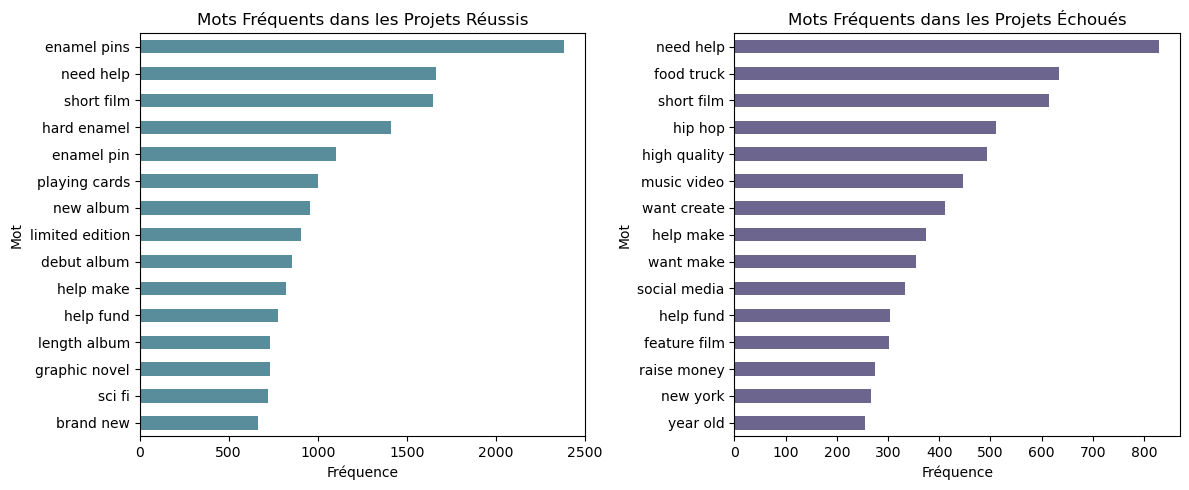

In [9]:


# Créer un vectoriseur pour les projets réussis
vectorizer_successful = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bag_of_words_successful = vectorizer_successful.fit_transform(df[df['status'] == 'successful']['blurb'])
tokenized_successful = vectorizer_successful.vocabulary_
sum_words_successful = bag_of_words_successful.sum(axis=0)
words_freq_successful = [(word, sum_words_successful[0, idx]) for word, idx in tokenized_successful.items()]
words_freq_successful = sorted(words_freq_successful, key=lambda x: x[1], reverse=True)
common_words_successful = words_freq_successful[:15]
df_common_words_successful = pd.DataFrame(common_words_successful, columns=['MOT', 'Freq'])

# Créer un vectoriseur pour les projets échoués
vectorizer_failed = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bag_of_words_failed = vectorizer_failed.fit_transform(df[df['status'] == 'failed']['blurb'])
tokenized_failed = vectorizer_failed.vocabulary_
sum_words_failed = bag_of_words_failed.sum(axis=0)
words_freq_failed = [(word, sum_words_failed[0, idx]) for word, idx in tokenized_failed.items()]
words_freq_failed = sorted(words_freq_failed, key=lambda x: x[1], reverse=True)
common_words_failed = words_freq_failed[:15]
df_common_words_failed = pd.DataFrame(common_words_failed, columns=['MOT', 'Freq'])

# Créer deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier graphique : mots fréquents dans les projets réussis
df_common_words_successful.groupby('MOT').sum()['Freq'].sort_values(ascending=True).plot.barh(ax=axes[0], color = '#598D9B')
axes[0].set_title('Mots Fréquents dans les Projets Réussis')
axes[0].set_xlabel('Fréquence')
axes[0].set_ylabel('Mot')

# Deuxième graphique : mots fréquents dans les projets échoués
df_common_words_failed.groupby('MOT').sum()['Freq'].sort_values(ascending=True).plot.barh(ax=axes[1] , color = '#6C668F')
axes[1].set_title('Mots Fréquents dans les Projets Échoués')
axes[1].set_xlabel('Fréquence')
axes[1].set_ylabel('Mot')

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques côte à côte
plt.show()


In [10]:


# Créer un vectoriseur pour les projets réussis
vectorizer_successful = CountVectorizer(ngram_range=(3, 3), stop_words='english')
bag_of_words_successful = vectorizer_successful.fit_transform(df[df['status'] == 'successful']['blurb'])
tokenized_successful = vectorizer_successful.vocabulary_
sum_words_successful = bag_of_words_successful.sum(axis=0)
words_freq_successful = [(word, sum_words_successful[0, idx]) for word, idx in tokenized_successful.items()]
words_freq_successful = sorted(words_freq_successful, key=lambda x: x[1], reverse=True)
common_words_successful = words_freq_successful[:15]
df_common_words_successful = pd.DataFrame(common_words_successful, columns=['MOT', 'Freq'])

# Créer un vectoriseur pour les projets échoués
vectorizer_failed = CountVectorizer(ngram_range=(3,3), stop_words='english')
bag_of_words_failed = vectorizer_failed.fit_transform(df[df['status'] == 'failed']['blurb'])
tokenized_failed = vectorizer_failed.vocabulary_
sum_words_failed = bag_of_words_failed.sum(axis=0)
words_freq_failed = [(word, sum_words_failed[0, idx]) for word, idx in tokenized_failed.items()]
words_freq_failed = sorted(words_freq_failed, key=lambda x: x[1], reverse=True)
common_words_failed = words_freq_failed[:15]
df_common_words_failed = pd.DataFrame(common_words_failed, columns=['MOT', 'Freq'])



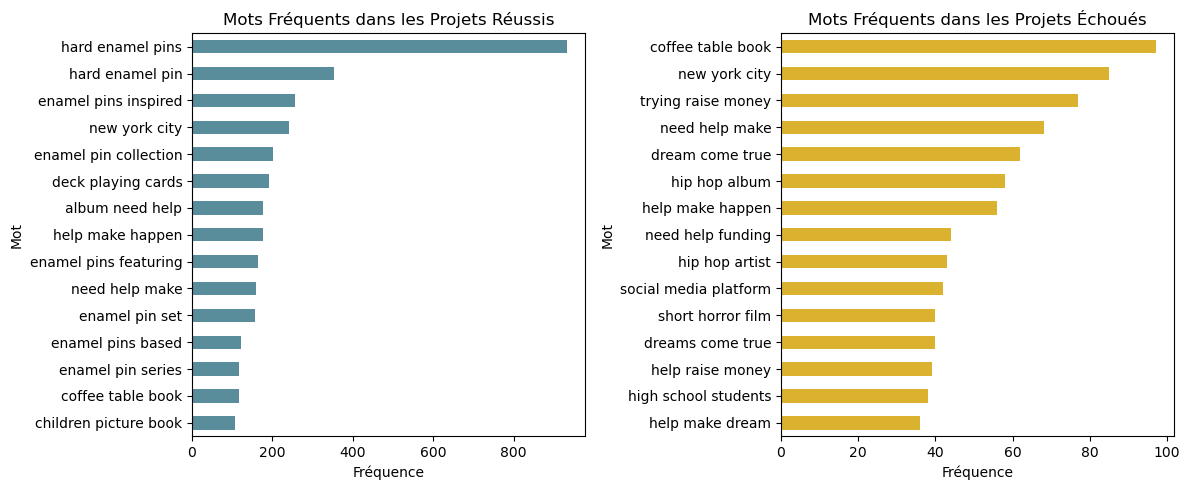

In [11]:
# Créer deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier graphique : mots fréquents dans les projets réussis
df_common_words_successful.groupby('MOT').sum()['Freq'].sort_values(ascending=True).plot.barh(ax=axes[0], color = '#598D9B')
axes[0].set_title('Mots Fréquents dans les Projets Réussis')
axes[0].set_xlabel('Fréquence')
axes[0].set_ylabel('Mot')

# Deuxième graphique : mots fréquents dans les projets échoués
df_common_words_failed.groupby('MOT').sum()['Freq'].sort_values(ascending=True).plot.barh(ax=axes[1] , color = '#DAB22F')
axes[1].set_title('Mots Fréquents dans les Projets Échoués')
axes[1].set_xlabel('Fréquence')
axes[1].set_ylabel('Mot')

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques côte à côte
plt.show()

In [ ]:
df = df[df['status'] == 'successful']
# Définir la variable text
text = ""
for comment in df.blurb :
    text += comment

# Importer stopwords de la classe nltk.corpus
from nltk.corpus import stopwords

# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
print(stop_words)
#Importer les packages nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Définir le calque du nuage des mots
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)
import matplotlib.pyplot as plt

# Générer et afficher le nuage de mots

plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

In [ ]:

df = df.drop(['Unnamed: 0','slug','name', 'creator_id','id', 'currency', 'launched_at', 'backers_count', 'country', 'goal_usd', "city", 'duration', 'deadline', 'usd_pledged', 'main_category', 'sub_category'], axis = 1)
df.head()

In [ ]:
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
import gensim
from gensim import models
from gensim import corpora
import nltk
nltk.download('wordnet')
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
txt = (df[df['status'] == 'successful']['blurb']).str.lower().str.cat(sep=' ')

In [ ]:
# Initialiser un tokeniseur
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")

# Calculer les tokens
tokens = tokenizer.tokenize(txt.lower())

#Afficher les 10 premiers tokens
print(tokens[:10])


In [ ]:
# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
# Mise à jour de la variable des mots vides
stop_words.update([",", "."])

# Définir la fonction stop_words_filtering
def stop_words_filtering(mots) :
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Appliquer la fonction stop_words_filtering à la variable tokens
tokens = stop_words_filtering(tokens)

In [ ]:
# Initialiser un lemmatiseur
wordnet_lemmatizer = WordNetLemmatizer()

# Affectation des lemmes à la variable tokens
tokens=[wordnet_lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
# Mise au bon format de la variable tokens (déjà tokeniser et lemmatiser)
text_list = [mots.split() for mots in tokens]
text_list

# création du dictionnaire
dictionary = corpora.Dictionary(text_list)

# création de la matrice document-terme
DTM = [dictionary.doc2bow(text) for text in text_list]

print(DTM[:(5)])

In [ ]:
def compute_coherence_values(dictionary,
                             corpus,
                             texts,
                             limit,
                             start,
                             step):
    """
    Calcule la cohérence c_v pour différente valeurs du nombre de topics

    Paramètres:
    ----------
    dictionary : dictionary
    corpus : matrice document-terme DTM
    texts : Liste du texte (text_list ici)
    limit : Max num of topics

    Returns:
    -------
    model_list : Liste des modèle de topics LDA
    coherence_values : Valeur de cohérence du modèle LDA
    avec le nombre de topics respectifs.
    """
    # On définit la variable cohérence_values - elle va enregistrer des scores
    coherence_values = []
    # On crée une variable model_list qui affichera les modèles LDA
    model_list = []
    for num_topics in range(start, limit, step):
        ldamodel = gensim.models.ldamodel.LdaModel(corpus=DTM,
                                           num_topics=num_topics,
                                           id2word=dictionary)
        model_list.append(ldamodel)
        coherencemodel = CoherenceModel(model=ldamodel,
                                        texts=text_list,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=DTM,
                                                        texts=text_list,
                                                        start=2,
                                                        limit=11,
                                                        step=1)

print(coherence_values)
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Nombre de topics")
plt.ylabel("Valeur de cohérence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=DTM,
                                           num_topics=2,
                                           id2word=dictionary,
                                           passes=2, random_state=5)
topics = ldamodel.print_topics(num_words=2)
for topic in topics:
    print(topic)

In [ ]:
cm = CoherenceModel(model=ldamodel, texts=text_list,
                    dictionary=dictionary, coherence='c_v')

coherence = cm.get_coherence()
print(round(coherence, 3))

In [ ]:
cm = CoherenceModel(model=ldamodel, texts=text_list,
                    dictionary=dictionary, coherence='c_v')

coherence = cm.get_coherence()
print(round(coherence, 4))

In [ ]:
cm = CoherenceModel(model=ldamodel, texts=text_list,
                    dictionary=dictionary, coherence='c_v')

coherence = cm.get_coherence()
print(round(coherence, 2))

In [ ]:
txt2 = (df[df['status'] == 'failed']['blurb']).str.lower().str.cat(sep=' ')

In [ ]:
# Initialiser un tokeniseur
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")

# Calculer les tokens
tokens2 = tokenizer.tokenize(txt2.lower())

#Afficher les 10 premiers tokens
print(tokens2[:10])


In [ ]:
# Initialiser la variable des mots vides
stop_words = set(stopwords.words('english'))
# Mise à jour de la variable des mots vides
stop_words.update([",", "."])

# Définir la fonction stop_words_filtering
def stop_words_filtering(mots) :
    tokens2 = []
    for mot in mots:
        if mot not in stop_words:
            tokens2.append(mot)
    return tokens2

# Appliquer la fonction stop_words_filtering à la variable tokens
tokens2 = stop_words_filtering(tokens2)

In [ ]:
# Initialiser un lemmatiseur
wordnet_lemmatizer = WordNetLemmatizer()

# Affectation des lemmes à la variable tokens
token2s=[wordnet_lemmatizer.lemmatize(word) for word in tokens2]

In [ ]:
# Mise au bon format de la variable tokens (déjà tokeniser et lemmatiser)
text_list2 = [mots.split() for mots in tokens2]
text_list2

# création du dictionnaire
dictionary = corpora.Dictionary(text_list2)

# création de la matrice document-terme
DTM2 = [dictionary.doc2bow(text) for text in text_list2]

print(DTM2[:(5)])


In [ ]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus=DTM2,
                                           num_topics=2,
                                           id2word=dictionary,
                                           passes=2, random_state=5)
topics2 = ldamodel2.print_topics(num_words=2)
for topic in topics2:
    print(topic)

In [ ]:
cm2 = CoherenceModel(model=ldamodel2, texts=text_list2,
                    dictionary=dictionary, coherence='c_v')

coherence2 = cm2.get_coherence()
print(round(coherence2, 2))

In [ ]:
ef compute_coherence_values(dictionary,
                             corpus,
                             texts,
                             limit,
                             start,
                             step):
    """
    Calcule la cohérence c_v pour différente valeurs du nombre de topics

    Paramètres:
    ----------
    dictionary : dictionary
    corpus : matrice document-terme DTM
    texts : Liste du texte (text_list ici)
    limit : Max num of topics

    Returns:
    -------
    model_list : Liste des modèle de topics LDA
    coherence_values : Valeur de cohérence du modèle LDA
    avec le nombre de topics respectifs.
    """
    # On définit la variable cohérence_values - elle va enregistrer des scores
    coherence_values = []
    # On crée une variable model_list qui affichera les modèles LDA
    model_list = []
    for num_topics in range(start, limit, step):
        ldamodel = gensim.models.ldamodel.LdaModel(corpus=DTM,
                                           num_topics=num_topics,
                                           id2word=dictionary)
        model_list.append(ldamodel)
        coherencemodel = CoherenceModel(model=ldamodel,
                                        texts=text_list,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=DTM,
                                                        texts=text_list,
                                                        start=2,
                                                        limit=11,
                                                        step=1)

print(coherence_values)
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Nombre de topics")
plt.ylabel("Valeur de cohérence")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Features Processing

In [17]:
from datetime import datetime


#
df['launched_at'] = pd.to_datetime(df['launched_at'], errors='coerce')

# Vérifier les valeurs de date invalides


# Extraire le jour de la semaine
df['day_of_week'] = df['launched_at'].dt.strftime('%A')

# Afficher le DataFrame modifié


In [18]:
#Features Preprocessing : Date
from datetime import datetime

df['launched_at'] = pd.to_datetime(df['launched_at'], format='%Y-%m-%d %H:%M')

#df['launched_at'] = df['launched_at'].apply(lambda df: pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M'))

import calendar
df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year
# Remplacer les mois numériques par les noms des mois
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [20]:
data = df[['currency','country','city','Category','sub_category','day_of_week', 'month', 'year','blurb','blurb_length','Goal','duration','status']]

data.status.unique()

data.head()

,currency,country,city,Category,sub_category,day_of_week,month,year,blurb,blurb_length,Goal,duration,status
0,CAD,CA,Victoria,food,Farms,Saturday,February,2018,"Earn $1,000 - $20,000+ by transforming idle re...",122,785.82065,60.0,failed
1,USD,US,San Diego,publishing,Academic,Friday,November,2014,"Need Peer Review, Open Source style",35,93.00000,24.0,successful
2,USD,US,Philadelphia,food,Small Batch,Monday,October,2020,Ultra-customized bean to bar chocolate. Any fl...,122,1500.00000,30.0,successful
3,USD,US,Chicago,technology,Gadgets,Wednesday,May,2019,A module device to monitor internet connection...,69,25000.00000,60.0,failed
4,USD,US,Madrid,publishing,Radio & Podcasts,Thursday,November,2015,"Madrid's low power FM community radio station,...",131,5000.00000,30.0,successful


In [21]:
# Encodage de la variable city
city_counts = data['city'].value_counts()
top_10_cities = city_counts.nlargest(10).index

data['city'] = data['city'].str.strip()

# Remplacer les noms de villes qui ne font pas partie des top 10 villes par "Other"
data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')

# Appliquer get_dummies() à la colonne 'city' modifiée
dummy_city_columns = pd.get_dummies(data['city'], prefix='city')

# Supprimer la colonne 'city_Other'
dummy_city_columns = dummy_city_columns.drop(['city_Other'], axis=1)

C:\Users\douja\AppData\Local\Temp\ipykernel_3756\131168419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].str.strip()
C:\Users\douja\AppData\Local\Temp\ipykernel_3756\131168419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['city'].apply(lambda x: x if x in top_10_cities else 'Other')


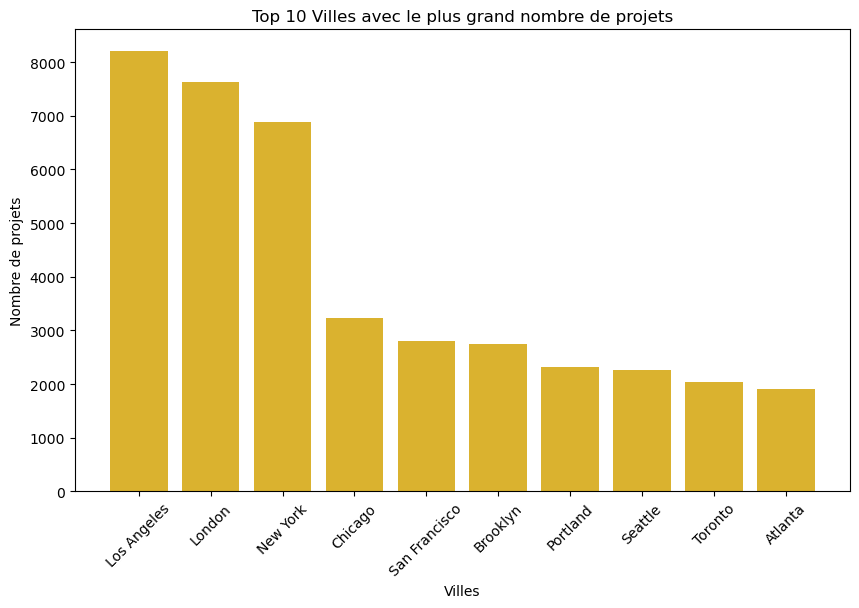

In [23]:
# Comptez le nombre de projets pour chaque ville
project_counts = data['city'].value_counts().loc[top_10_cities]
plt.figure(figsize=(10,6))
# Créez un graphe à barres
plt.bar(project_counts.index, project_counts.values, color = '#DAB22F')

# Ajoutez des étiquettes aux axes x et y
plt.xlabel('Villes')
plt.ylabel('Nombre de projets')

# Ajoutez un titre au graphe
plt.title('Top 10 Villes avec le plus grand nombre de projets')

# Faites pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichez le graphe à barres
plt.show()

## Encodage des 3 grames pour 'Successful Projects'

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Premier code pour extraire les 3-grammes
corpus = (df[df['status'] == 'successful']['blurb'])
n = 3
N = 15

def get_top_n_grams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    bag_of_words = vectorizer.fit_transform(corpus)
    tokenized = vectorizer.vocabulary_
    sum_words = bag_of_words.sum(axis=0)

    # Création dictionnaire (keys=mots, values=fréquence)
    values = []
    keys = list(tokenized.keys())
    for cle, valeur in tokenized.items():
        values.append(sum_words[0, valeur])

    dictionary = dict(zip(keys, values))

    # Tri par ordre décroissant des values du dictionnaire et conservation du format dictionnaire
    dictionary_sorted = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

    return [item[0] for item in dictionary_sorted[:N]]

# Application de la fonction pour obtenir les 3-grammes du premier code
three_grams = get_top_n_grams(corpus, n)

# Deuxième code pour extraire les mêmes 3-grammes que le premier code
# Importez les stopwords de CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

# Filtrer les projets réussis
successful_projects = data[data['status'] == 'successful']
successful_texts = successful_projects['blurb']

# Filtrer les stopwords des textes
filtered_texts_successful = [' '.join([word for word in str(text).split() if word.lower() not in stop_words]) for text in successful_texts]

# Utiliser CountVectorizer pour extraire les 2-grammes en utilisant les mêmes stopwords
successful_vectorizer = CountVectorizer(ngram_range=(3, 3), vocabulary=three_grams)
X = successful_vectorizer.fit_transform(filtered_texts_successful)

# Créer un DataFrame pour les 3-grammes
three_grams_successful = pd.DataFrame(X.toarray(), columns=successful_vectorizer.get_feature_names_out())

# Afficher le DataFrame mis à jour
three_grams_successful.head()


,hard enamel pins,hard enamel pin,enamel pins inspired,new york city,enamel pin collection,deck playing cards,album need help,help make happen,enamel pins featuring,need help make,enamel pin set,enamel pins based,coffee table book,enamel pin series,children picture book
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:

# extraire les 3-grammes
corpus = (df[df['status'] == 'failed']['blurb'])
n = 3
N = 15


# Application de la fonction pour obtenir les 3-grammes 
three_grams = get_top_n_grams(corpus, n)

# Deuxième code pour extraire les mêmes 3-grammes que le premier code
# Importez les stopwords de CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

# Filtrer les projets réussis
failed_projects = data[data['status'] == 'failed']
failed_texts = failed_projects['blurb']

# Filtrer les stopwords des textes
filtered_texts_failed = [' '.join([word for word in str(text).split() if word.lower() not in stop_words]) for text in failed_texts]

# Utiliser CountVectorizer pour extraire les 3-grammes en utilisant les mêmes stopwords
failed_vectorizer = CountVectorizer(ngram_range=(3, 3), vocabulary=three_grams)
X = failed_vectorizer.fit_transform(filtered_texts_failed)

# Créer un DataFrame pour les 3-grammes
three_grams_failed = pd.DataFrame(X.toarray(), columns=failed_vectorizer.get_feature_names_out())

# Afficher le DataFrame mis à jour
three_grams_failed.head()


,coffee table book,new york city,trying raise money,need help make,dream come true,hip hop album,help make happen,need help funding,hip hop artist,social media platform,dreams come true,short horror film,help raise money,high school students,help make dream
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:

# Supprimer les 3-grammes communs entre les projets réussis et échoués
common_3_grams = set(three_grams_failed.columns) & set(three_grams_successful.columns)
three_grams_successful.drop(columns=common_2_grams, inplace=True)


In [24]:
three_grams_successful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109205 entries, 0 to 109204
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   hard enamel pins       109205 non-null  int64
 1   hard enamel pin        109205 non-null  int64
 2   enamel pins inspired   109205 non-null  int64
 3   enamel pin collection  109205 non-null  int64
 4   deck playing cards     109205 non-null  int64
 5   album need help        109205 non-null  int64
 6   enamel pins featuring  109205 non-null  int64
 7   enamel pin set         109205 non-null  int64
 8   enamel pins based      109205 non-null  int64
 9   enamel pin series      109205 non-null  int64
 10  children picture book  109205 non-null  int64
dtypes: int64(11)
memory usage: 9.2 MB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [27]:
features = data.drop(['status'], axis = 1)
target = data['status']
features.head()
target

0             failed
1         successful
2         successful
3             failed
4         successful
             ...    
197712    successful
197713        failed
197714        failed
197716    successful
197717    successful
Name: status, Length: 184899, dtype: object

In [29]:
three_grams_successful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102028 entries, 0 to 109204
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   hard enamel pins       102028 non-null  int64
 1   hard enamel pin        102028 non-null  int64
 2   enamel pins inspired   102028 non-null  int64
 3   enamel pin collection  102028 non-null  int64
 4   deck playing cards     102028 non-null  int64
 5   album need help        102028 non-null  int64
 6   enamel pins featuring  102028 non-null  int64
 7   enamel pin set         102028 non-null  int64
 8   enamel pins based      102028 non-null  int64
 9   enamel pin series      102028 non-null  int64
 10  children picture book  102028 non-null  int64
dtypes: int64(11)
memory usage: 9.3 MB


In [30]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184899 entries, 0 to 197717
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   currency       184899 non-null  object 
 1   country        184899 non-null  object 
 2   city           184899 non-null  object 
 3   sub_category   184899 non-null  object 
 4   main_category  184899 non-null  object 
 5   day_of_week    184899 non-null  object 
 6   month          184899 non-null  object 
 7   year           184899 non-null  int64  
 8   blurb          184899 non-null  object 
 9   blurb_length   184899 non-null  int64  
 10  goal_usd       184899 non-null  float64
 11  duration       184899 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 18.3+ MB


In [32]:
cat_feat = ['currency','country','sub_category','main_category','month','day_of_week']

cat_feat_dummies = pd.get_dummies(features[cat_feat])
cat_feat_dummies.head()

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,...,month_November,month_October,month_September,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [69]:
feat_dummies  = pd.concat([cat_feat_dummies, dummy_city_columns], axis=1)
feats  = pd.concat([feat_dummies, three_grams_successful], axis=1)
feats = pd.concat([features[[ 'goal_usd', 'duration','blurb', 'blurb_length','year']], feats], axis=1)



In [68]:
# standardisation des indices

common_indices = feats.index.intersection(three_grams_successful.index)
three_grams_successful = three_grams_successful.loc[common_indices]
feats.head()

,goal_usd,duration,blurb_length,year,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,hard enamel pin,enamel pins inspired,enamel pin collection,deck playing cards,album need help,enamel pins featuring,enamel pin set,enamel pins based,enamel pin series,children picture book
0,785.82065,60.0,122,2018,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93.00000,24.0,35,2014,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1500.00000,30.0,122,2020,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25000.00000,60.0,69,2019,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5000.00000,30.0,131,2015,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
feats = feats.drop('blurb', axis = 1)

In [54]:
# Suppression des NANs

feats.head()
feats = feats.fillna(0)


array([0., 1., 2.])

In [58]:
feats.isna().sum()

goal_usd                 0
duration                 0
blurb_length             0
year                     0
currency_AUD             0
                        ..
enamel pins featuring    0
enamel pin set           0
enamel pins based        0
enamel pin series        0
children picture book    0
Length: 258, dtype: int64

In [56]:
X_train, X_test,y_train, y_test = train_test_split(feats, target , test_size = 0.2, random_state =42 , stratify = target)

In [38]:
print(feats.shape)
print(target.shape)

(184899, 258)
(184899,)


In [57]:
scaler = StandardScaler()

X_train[['goal_usd', 'duration', 'blurb_length', 'year']] = scaler.fit_transform(X_train[['goal_usd', 'duration', 'blurb_length', 'year']])
X_test[['goal_usd', 'duration', 'blurb_length', 'year']] = scaler.transform(X_test[['goal_usd', 'duration', 'blurb_length', 'year']])

X_train.head()

,goal_usd,duration,blurb_length,year,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,...,hard enamel pin,enamel pins inspired,enamel pin collection,deck playing cards,album need help,enamel pins featuring,enamel pin set,enamel pins based,enamel pin series,children picture book
178942,-0.036008,2.223963,0.389319,0.261613,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168034,-0.034547,-0.241326,0.793243,-0.556414,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110309,-0.031415,-0.816559,-0.384870,0.261613,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100975,-0.021472,2.223963,0.793243,-0.965427,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21252,-0.031415,-0.816559,0.759583,-2.192468,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y_train = y_train.replace(to_replace=['successful', 'failed'], value = [1,0])

y_test = y_test.replace(to_replace=['successful', 'failed'], value = [1,0])

y_train.head()

178942    1
168034    1
110309    1
100975    0
21252     0
Name: status, dtype: int64

In [61]:
import time

from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [62]:
model = RandomForestClassifier(random_state = 42)
    
model.fit(X_train, y_train)
    # Prédisez les valeurs
y_pred = model.predict(X_test)
    


In [63]:
display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print('le rapport de classification du model Random Forest est \n',  classification_report(y_test, y_pred))

Prédiction,0,1
Realité,,
0,11999,3140
1,4044,17797


le rapport de classification du model Random Forest est 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     15139
           1       0.85      0.81      0.83     21841

    accuracy                           0.81     36980
   macro avg       0.80      0.80      0.80     36980
weighted avg       0.81      0.81      0.81     36980



In [70]:
    # Calculez les métriques
accuracy = model.score(X_test,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy :',    accuracy )
print('precision :',    precision )
print('recall:',   recall )
print('f1:',   f1)



Accuracy : 0.8057328285559762
precision : 0.8701638026329012
recall: 0.7929124124353281
f1: 0.8297439091584218


### UnderSampling

In [64]:
#Random Undersampling
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))


Classes échantillon undersampled : {0: 60555, 1: 60555}


In [71]:
model_ru = RandomForestClassifier(random_state = 42)
    
model_ru.fit(X_ru, y_ru)
    # Prédisez les valeurs
y_pred = model_ru.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print('le rapport de classification imbalanced du model Random Forest est \n', classification_report_imbalanced(y_test, y_pred))

Prédiction,0,1
Realité,,
0,13345,1794
1,5638,16203


le rapport de classification imbalanced du model Random Forest est 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.88      0.74      0.78      0.81      0.66     15139
          1       0.90      0.74      0.88      0.81      0.81      0.64     21841

avg / total       0.82      0.80      0.82      0.80      0.81      0.65     36980



In [72]:
accuracy = model_ru.score(X_test,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy :',    accuracy )
print('precision :',    precision )
print('recall:',   recall )
print('f1:',   f1)

Accuracy : 0.7990265008112494
precision : 0.9003167194532422
recall: 0.741861636371961
f1: 0.8134444500225916


# Oversampling

In [73]:

rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))


Classes échantillon oversampled : {1: 87364, 0: 87364}
Classes échantillon SMOTE : {1: 87364, 0: 87364}


In [74]:
  # Entraînez votre modèle ici 
model_Os = RandomForestClassifier(random_state = 42)
    
model_Os.fit(X_ro, y_ro)
    # Prédisez les valeurs
y_pred = model_Os.predict(X_test)

In [75]:
accuracy = model_Os.score(X_test,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy :',    accuracy )
print('precision :',    precision )
print('recall:',   recall )
print('f1:',   f1)

Accuracy : 0.8063277447268794
precision : 0.8676919993988277
recall: 0.7930039833340964
f1: 0.8286684847614946


In [76]:
display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print('le rapport de classification imbalanced du model Random Forest est \n', classification_report_imbalanced(y_test, y_pred))

Prédiction,0,1
Realité,,
0,12498,2641
1,4521,17320


le rapport de classification imbalanced du model Random Forest est 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.83      0.79      0.78      0.81      0.66     15139
          1       0.87      0.79      0.83      0.83      0.81      0.65     21841

avg / total       0.81      0.81      0.81      0.81      0.81      0.65     36980



In [77]:
model_sm = RandomForestClassifier(random_state = 42)
    
model_sm.fit(X_sm, y_sm)
    # Prédisez les valeurs
y_pred = model_sm.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print('le rapport de classification imbalanced du model Random Forest est \n', classification_report_imbalanced(y_test, y_pred))

Prédiction,0,1
Realité,,
0,12717,2422
1,4726,17115


le rapport de classification imbalanced du model Random Forest est 
                    pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.84      0.78      0.78      0.81      0.66     15139
          1       0.88      0.78      0.84      0.83      0.81      0.65     21841

avg / total       0.82      0.81      0.82      0.81      0.81      0.66     36980



In [78]:
accuracy = model_sm.score(X_test,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy :',    accuracy )
print('precision :',    precision )
print('recall:',   recall )
print('f1:',   f1)

Accuracy : 0.8067063277447268
precision : 0.8760300967395199
recall: 0.7836179662103383
f1: 0.8272511962878825
